In [1]:
import h5py
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../Netket/')
import analysis
from numpy import sqrt, pi, exp
from analysis import std_phase, ipr, pca_entropy, renyi_entropy, mean_amplitude, uniform_state_overlap, infidelity
# Directory containing the partial results
outfile = '../data/cluster_expansion_analysis/expansion_infidelities_merged.h5'
outfile_exp = '../data/cluster_expansion_analysis_exp/expansion_infidelities_merged.h5'

In [2]:
with h5py.File(outfile, 'r') as h5:
    infidels_exact_opt_mat = h5['infidels_exact_opt_mat'][:]
    infidels_RBM_opt_mat = h5['infidels_RBM_opt_mat'][:]
    compr_idx_list = h5['compr_idx_list'][:]
    idxs = h5['idxs'][:]

with h5py.File(outfile_exp, 'r') as h5:
    infidels_exact_opt_mat_exp = h5['infidels_exact_opt_mat'][:]
    infidels_RBM_opt_mat_exp = h5['infidels_RBM_opt_mat'][:]
    compr_idx_list_exp = h5['compr_idx_list'][:]
    idxs_exp = h5['idxs'][:]

In [3]:
idxs[10]

np.int64(60)

In [4]:

hypotheses = {
    "std_phase" : std_phase,
    "IPR" : ipr,
    "SPCA" : pca_entropy,
    "Renyi_2" : renyi_entropy,
    "uniform_state_overlap" : uniform_state_overlap,
    "mean_amplitude" : mean_amplitude,
}

data_root = '..'

h5_files_opt = [os.path.join(f"{data_root}/data/data_optimal_basis_rbm", f) for f in os.listdir(f'{data_root}/data/data_optimal_basis_rbm') if f.endswith('.h5')]
df_opt = analysis.load_outputs_to_dataframe(h5_files_opt, load_eigenstates=False)
df_opt = analysis.attach_hypotheses_fields(df_opt, hypotheses)
df_opt["idx"] = df_opt["file"].apply(lambda x: int(os.path.basename(x).split('_')[2]))
print(len(df_opt))

230


In [5]:
idxs_below_threshold = np.where(infidels_exact_opt_mat[:, 50] < 0.15)[0]
print(idxs_below_threshold)

[  0   1   6   8  13  14  16  19  21  26  27  34  35  39  48  49  51  52
  53  54  74  75  80  82  86  89  90  91  95  96 101 102 108 111 114 119
 120 124 131 140 141 143 148 149 152 155 157 166 171 177 183 188 194 196
 198 204 211 218 219 222 223 224 227]


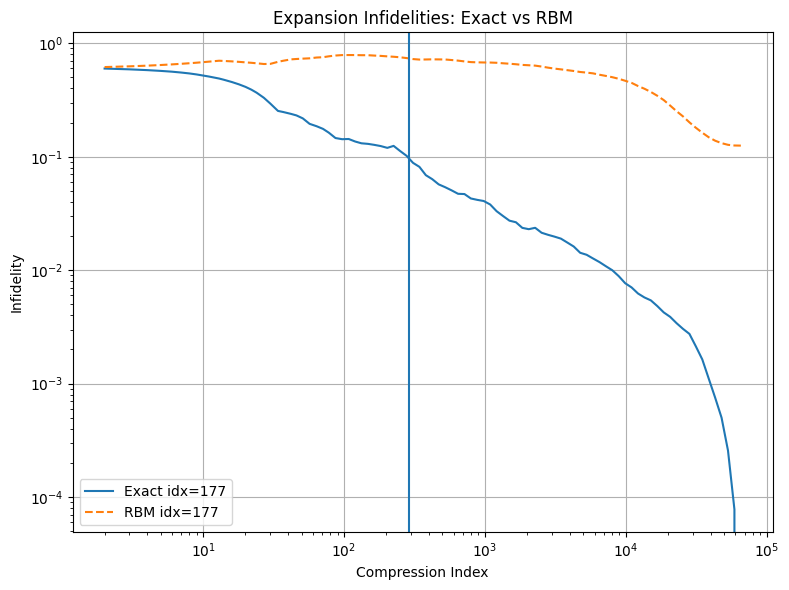

In [6]:
# Choose some indices to plot, for example the first 5 in idxs_below_threshold
indices_to_plot = [177]

plt.figure(figsize=(8, 6))
for idx in indices_to_plot:
    plt.plot(compr_idx_list, infidels_exact_opt_mat[idx], label=f'Exact idx={idx}', linestyle='-')
    plt.plot(compr_idx_list, infidels_RBM_opt_mat[idx], label=f'RBM idx={idx}', linestyle='--')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Compression Index')
plt.ylabel('Infidelity')
plt.title('Expansion Infidelities: Exact vs RBM')
plt.axvline(x=16**2+16*2)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
def value_to_color(val, vmin, vmax, cmap='viridis'):
    """
    Map a value in [vmin, vmax] to a color using a matplotlib colormap.
    
    Args:
        val (float): The value to map.
        vmin (float): Minimum value of the range.
        vmax (float): Maximum value of the range.
        cmap (str or Colormap): Matplotlib colormap name or object.
        
    Returns:
        tuple: RGBA color tuple.
    """
    normed = (val - vmin) / (vmax - vmin)
    normed = min(max(normed, 0.0), 1.0)  # Clamp to [0, 1]
    cmap_obj = plt.get_cmap(cmap)
    return cmap_obj(normed)

In [8]:
def get_phase_overlap(psiRBM,psi0):
    psiRBM_phasepart = psiRBM / np.abs(psiRBM)
    psi0_phasepart = psi0 / np.abs(psi0)
    psiAbs2 = np.abs(psi0)**2
    overlap = np.sum(np.conj(psi0_phasepart) * psiRBM_phasepart * psiAbs2)/np.sum(psiAbs2)
    return 1 - abs(overlap)**2

def get_amplitude_infidelity(psi1,psi2):
    psi1_amplitudepart = np.abs(psi1)
    psi2_amplitudepart = np.abs(psi2)
    return infidelity(psi1_amplitudepart, psi2_amplitudepart)

In [9]:
std_phases_below = []
for idx in idxs_below_threshold:
    df_idx = idxs[idx]
    std_phase_val = abs(df_opt.loc[df_opt['idx'] == df_idx, 'std_phase'].values - sqrt(pi)/3)
    if len(std_phase_val) > 0:
        std_phases_below.append(std_phase_val[0])
    else:
        std_phases_below.append(np.nan)
std_phases_below = np.array(std_phases_below)
print(std_phases_below)

[0.49816014 0.4703044  0.39527071 0.21345352 0.31193641 0.05239037
 0.41137077 0.32341086 0.21925066 0.13535334 0.15263077 0.04277574
 0.35405708 0.21416288 0.03891512 0.32562703 0.42201437 0.12567193
 0.38018121 0.4098478  0.25036932 0.4951478  0.23750795 0.29250908
 0.11683823 0.40506289 0.23356522 0.41628128 0.03598189 0.28728127
 0.15216706 0.17763081 0.03248607 0.18147862 0.44803608 0.40452872
 0.45168304 0.14318965 0.13553475 0.35768683 0.45596476 1.2749409
 0.06214521 0.17149626 0.10251125 0.45502773 0.51710461 0.37973616
 0.26847029 0.09596394 0.10264874 0.41448897 0.23906644 0.24248107
 0.09578925 0.0345603  0.43498569 0.01938443 0.17267702 0.2452535
 0.21308403 0.00397598 1.08063173]


In [10]:
phase_infids_below = []
for idx in idxs_below_threshold:
    df_idx = idxs[idx]
    psi_exact = df_opt.loc[df_opt['idx'] == df_idx, 'psi_0'].values[0]
    psi_opt = df_opt.loc[df_opt['idx'] == df_idx, 'psi'].values[0]
    phase_infidelity_val = get_phase_overlap(psi_exact, psi_opt)
    phase_infids_below.append(phase_infidelity_val)
phase_infids_below = np.array(phase_infids_below)
ampl_infids_below = []
for idx in idxs_below_threshold:
    df_idx = idxs[idx]
    psi_exact = df_opt.loc[df_opt['idx'] == df_idx, 'psi_0'].values[0]
    psi_opt = df_opt.loc[df_opt['idx'] == df_idx, 'psi'].values[0]
    phase_infidelity_val = get_amplitude_infidelity(psi_exact, psi_opt)
    ampl_infids_below.append(phase_infidelity_val)

ampl_infids_below = np.array(ampl_infids_below)

In [11]:
phase_infids_below

array([6.73712034e-04, 7.20395362e-03, 2.29282851e-04, 5.38979281e-03,
       2.45249212e-04, 9.72325171e-03, 6.11713559e-04, 9.67700440e-04,
       2.28661512e-02, 1.75022822e-01, 3.45963362e-03, 4.84623094e-03,
       2.91626819e-03, 1.34806630e-03, 1.91882308e-02, 2.28536546e-03,
       3.76582143e-02, 6.22327547e-03, 3.20853417e-04, 2.11042569e-04,
       7.52116269e-03, 6.25600909e-04, 6.68786362e-04, 4.09673501e-03,
       7.27991020e-04, 6.32395397e-04, 1.17286338e-03, 2.11145133e-04,
       5.12211725e-03, 2.00022896e-04, 8.89971387e-04, 1.36235564e-03,
       2.06528799e-03, 3.33721102e-03, 6.00527350e-04, 1.30961235e-04,
       2.02620075e-04, 8.88100086e-04, 7.57821535e-03, 1.37602980e-04,
       1.13193223e-04, 2.61933414e-03, 2.55491539e-03, 6.63265021e-04,
       4.28261275e-03, 2.94971474e-02, 1.09970013e-02, 2.17416965e-03,
       1.34925071e-03, 6.06731002e-02, 3.46543002e-02, 8.94906227e-05,
       6.36561527e-04, 2.86598042e-04, 4.52961788e-03, 7.77986633e-03,
      

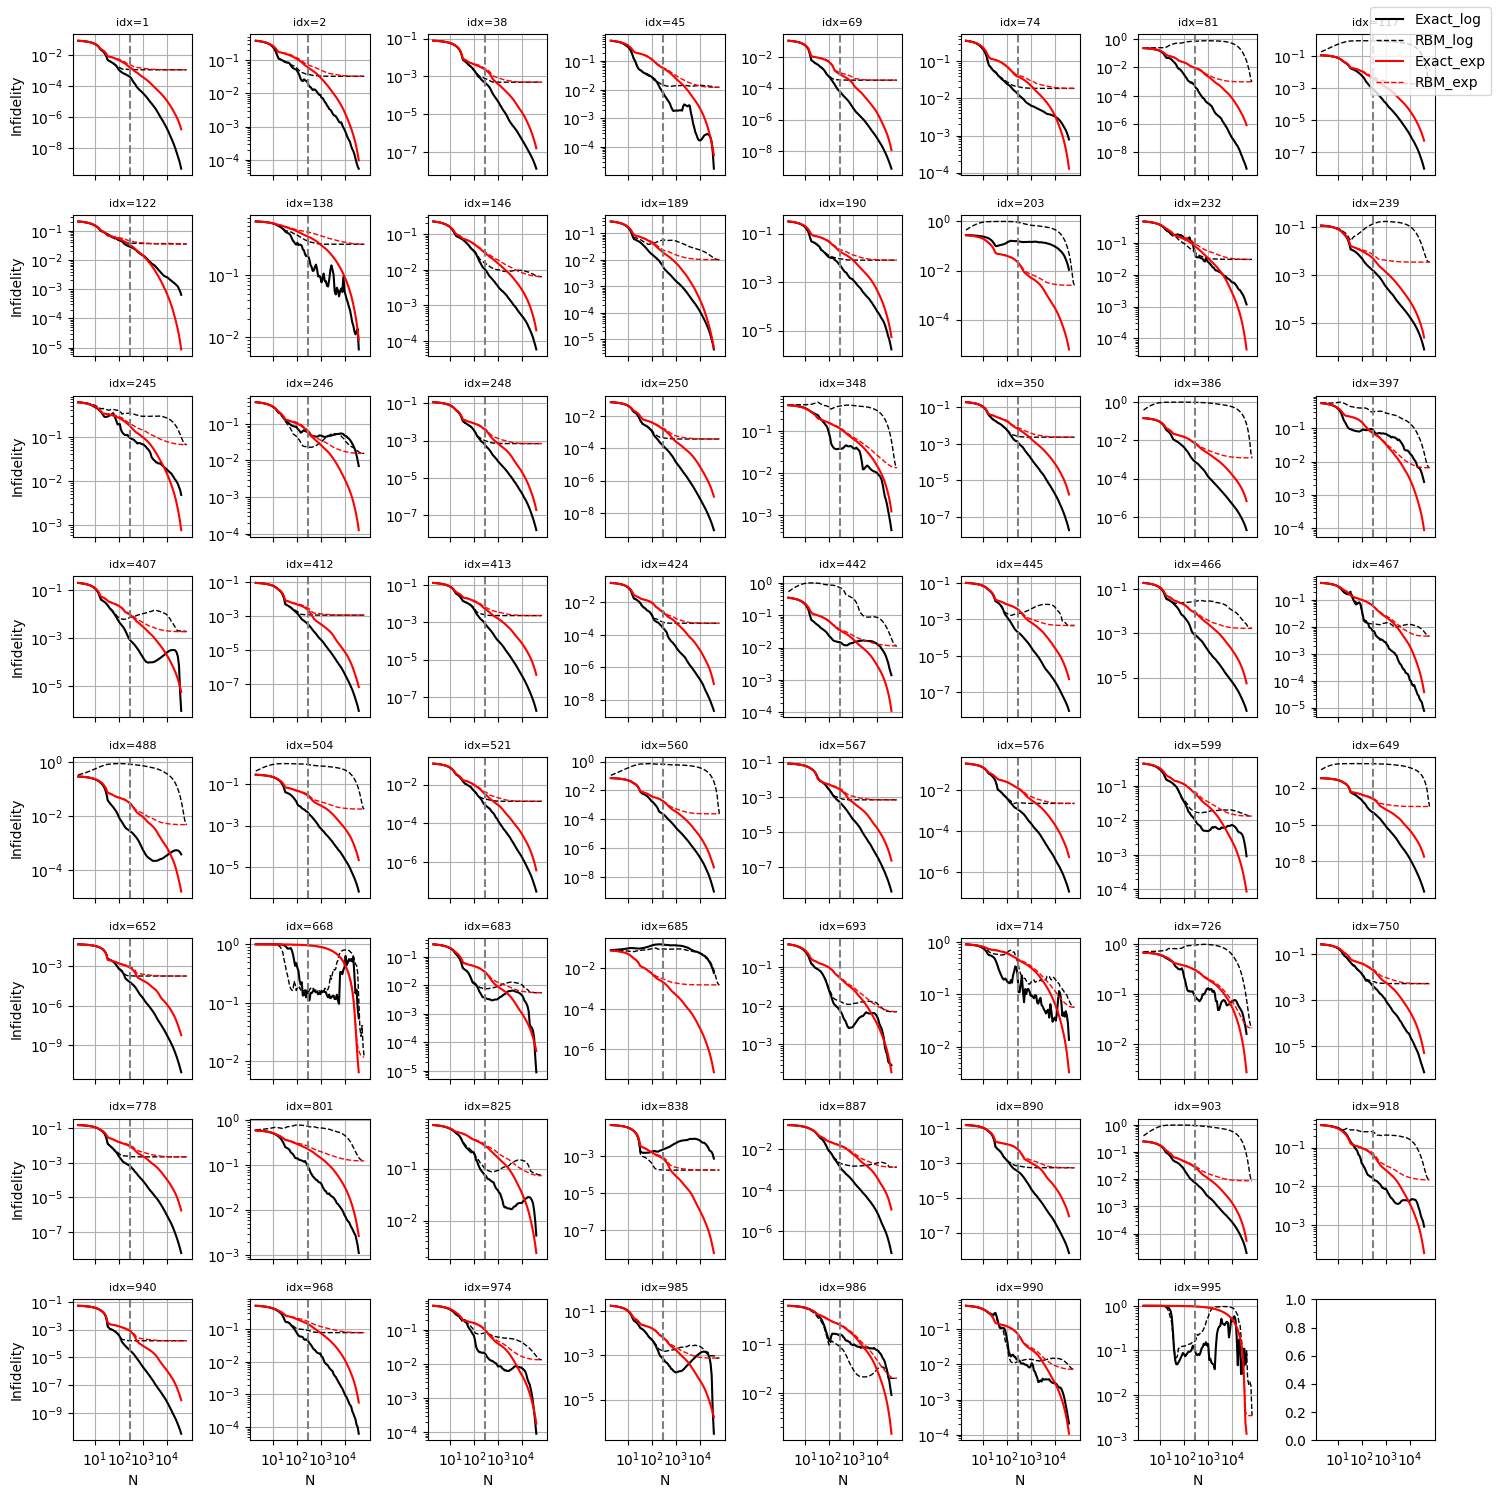

In [12]:
from matplotlib.cm import ScalarMappable

# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(15, 15), sharex=True, sharey=False)

# hypothesis_quantity = std_phases_below
hypothesis_quantity = np.log10(phase_infids_below)
# hypothesis_quantity = np.log10(ampl_infids_below)

extrema_std_normality = np.min(hypothesis_quantity), np.max(hypothesis_quantity)
# extrema_std_normality = np.min(hypothesis_quantity), -2
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idxs_below_threshold):
            continue
        idx = idxs_below_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            color_value = hypothesis_quantity[idxij]
            # if color_value > -2:
            #     axes[i, j].axis('off')
            #     continue
            ax = axes[i, j]
            ax.plot(compr_idx_list[0:-5], infidels_exact_opt_mat[idx][0:-5], label='Exact_log',color = "black")
            ax.plot(compr_idx_list, infidels_RBM_opt_mat[idx], label='RBM_log', color = "black", lw= 1, ls='--')
            # std_normality = df_opt.loc[df_opt['idx'] == idx, 'std_phase'].values - sqrt(pi)/3
            # color = value_to_color(color_value, extrema_std_normality[0], extrema_std_normality[1], cmap='plasma')
            color = "red"
            ax.plot(compr_idx_list_exp[0:-5], infidels_exact_opt_mat_exp[idx][0:-5], label='Exact_exp',color = "red",)
            ax.plot(compr_idx_list_exp, infidels_RBM_opt_mat_exp[idx], label='RBM_exp', color = "red", lw= 1, ls='--')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_xticks([10, 100, 1000, 10000])
            ax.axvline(x=16**2+16*2, color='grey', linestyle='--')
            # ax.axvline(x=32, color='grey', linestyle='--')
            # ax.set_title(f'idx={idx}',fontsize=8)
            ax.set_title(f'idx={idxs[idx]}',fontsize=8)
            ax.grid(True)
            if i == 7:
                ax.set_xlabel('N')
            if j == 0:
                ax.set_ylabel('Infidelity')
        else:
            axes[i, j].axis('off')
            
            # Add a colorbar for std_normality

sm = ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=extrema_std_normality[0], vmax=extrema_std_normality[1]))
sm.set_array([])
# cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.015, pad=-0.15)
# cbar.set_label('std_phase - $\\sqrt{\\pi}/3$')
# cbar.set_label('log10(ampl infidelity)')
# cbar.set_label('log10(phase infidelity)')
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

In [13]:
idx_above_threshold = np.where(infidels_exact_opt_mat[:, 50] >= 0.15)[0]
len(idx_above_threshold)

167

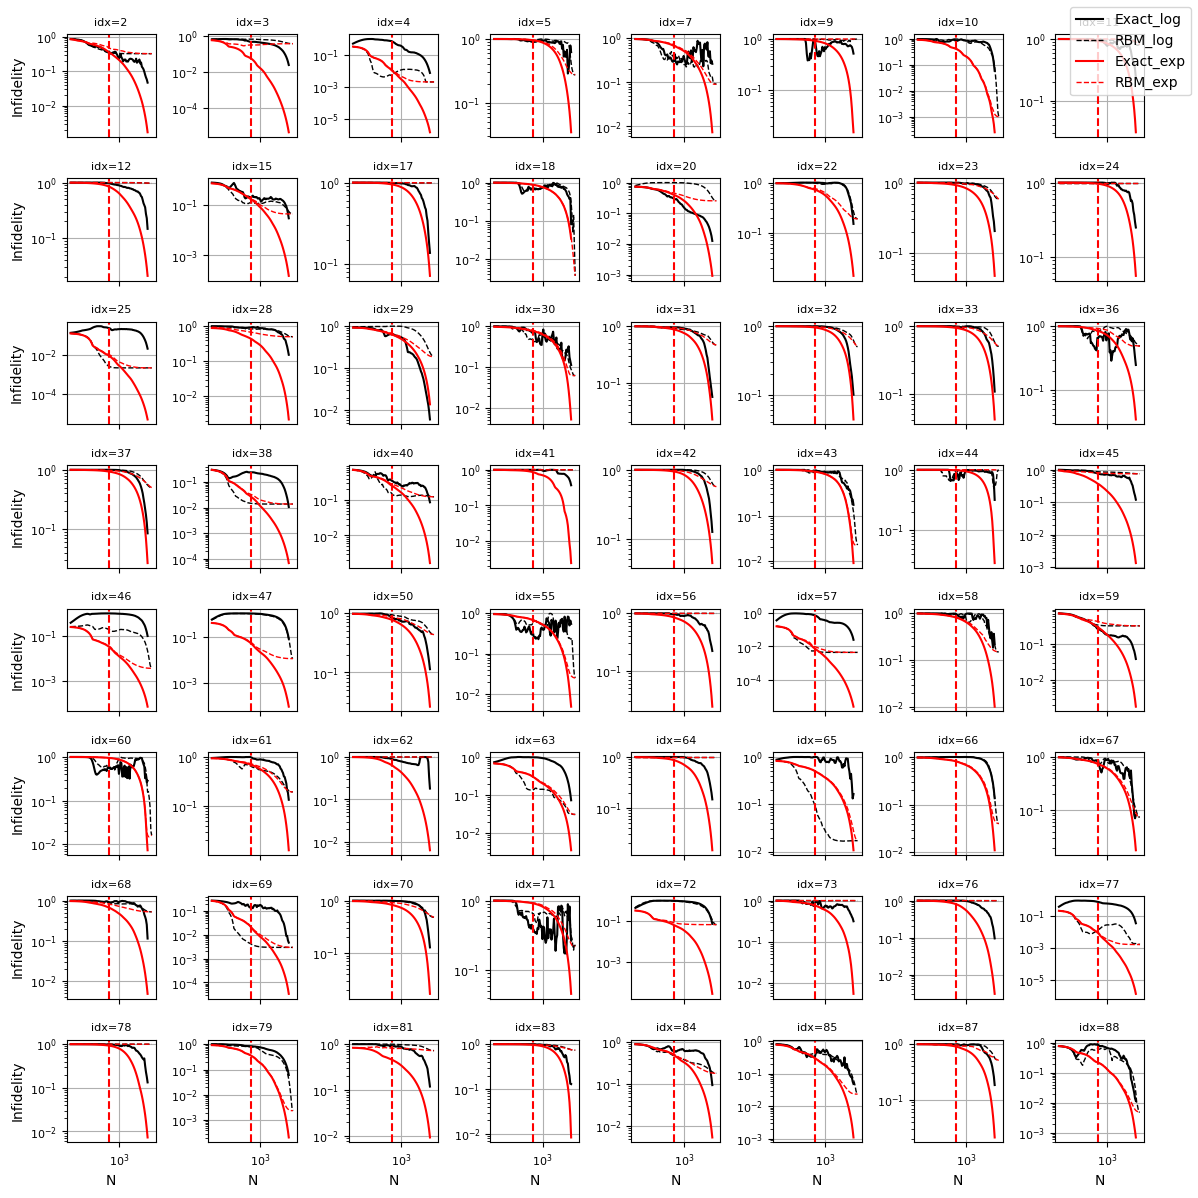

In [19]:
# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=False)
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idx_above_threshold):
            continue
        idx = idx_above_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            ax = axes[i, j]
            ax.tick_params(axis='both', which='major', labelsize=8)
            ax.plot(compr_idx_list[0:-5], infidels_exact_opt_mat[idx][0:-5], label='Exact_log',color = "black")
            ax.plot(compr_idx_list, infidels_RBM_opt_mat[idx], label='RBM_log', color = "black", lw= 1, ls='--')
            # std_normality = df_opt.loc[df_opt['idx'] == idx, 'std_phase'].values - sqrt(pi)/3
            # color = value_to_color(color_value, extrema_std_normality[0], extrema_std_normality[1], cmap='plasma')
            color = "red"
            ax.plot(compr_idx_list_exp[0:-5], infidels_exact_opt_mat_exp[idx][0:-5], label='Exact_exp',color = "red",)
            ax.plot(compr_idx_list_exp, infidels_RBM_opt_mat_exp[idx], label='RBM_exp', color = "red", lw= 1, ls='--')
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.axvline(x=16**2+16*2, color='red', linestyle='--')
            ax.set_title(f'idx={idx}',fontsize=8)
            ax.grid(True)
            if i == 7:
                ax.set_xlabel('N')
            if j == 0:
                ax.set_ylabel('Infidelity')
        else:
            axes[i, j].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

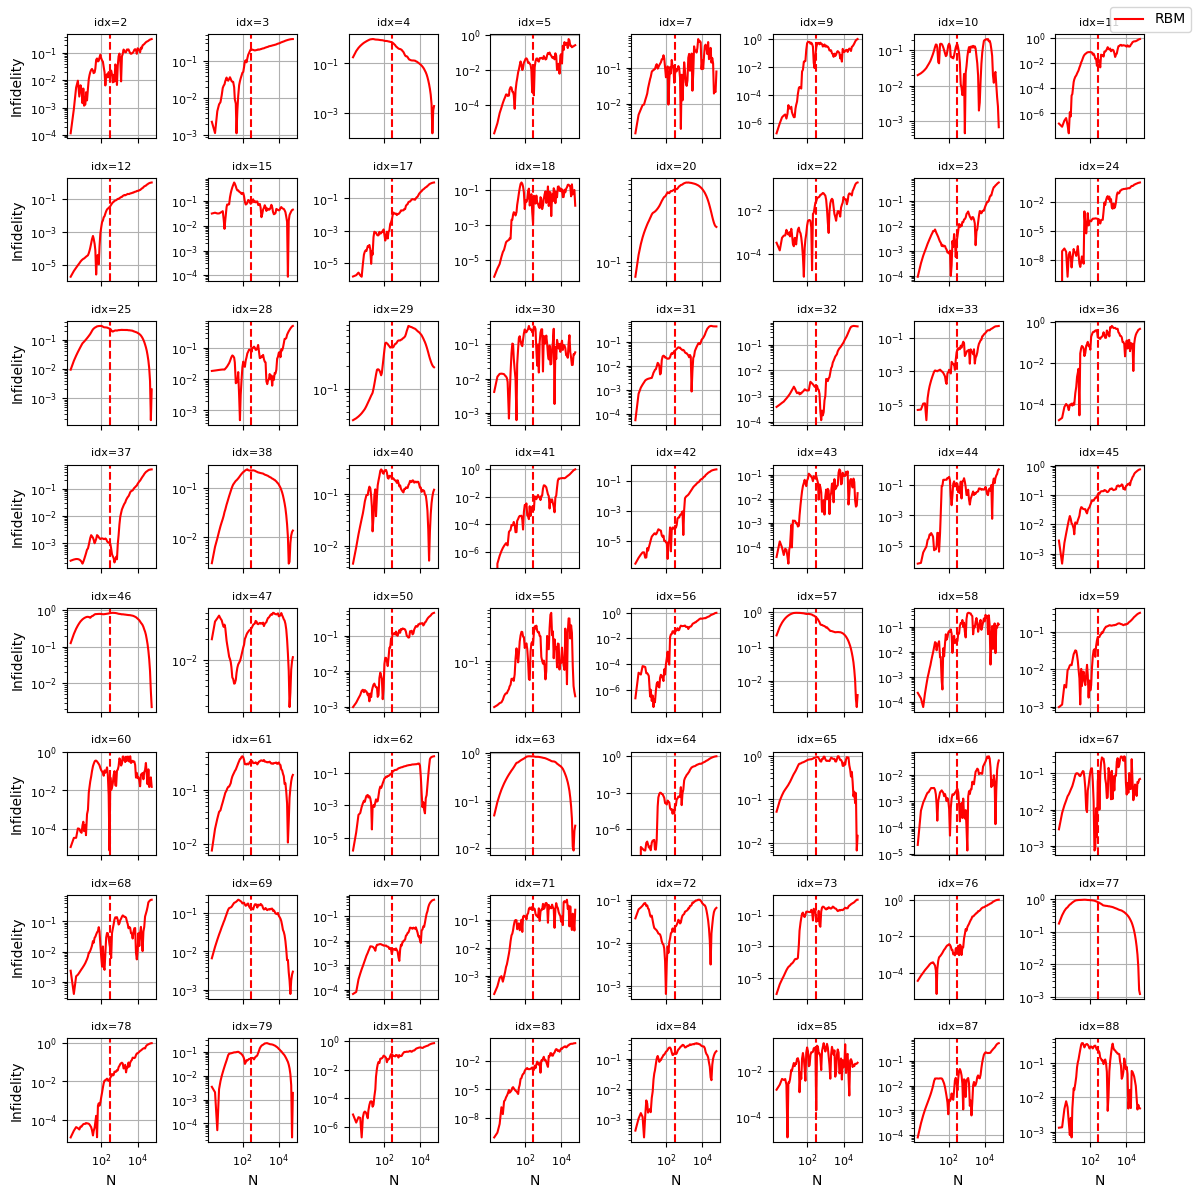

In [15]:
# fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(8, 8, figsize=(12, 12), sharex=True, sharey=False)
for i in range(8):
    for j in range(8):
        idxij = i * 8 + j
        if idxij >= len(idx_above_threshold):
            continue
        idx = idx_above_threshold[idxij] 
        if idx < infidels_exact_opt_mat.shape[0]:
            ax = axes[i, j]
            ax.tick_params(axis='both', which='major', labelsize=8)
            # ax.plot(compr_idx_list[0:-1], infidels_exact_opt_mat[idx][0:-1], label='Exact',color = "black")
            # ax.plot(compr_idx_list[0:-1], infidels_RBM_opt_mat[idx][0:-1], label='RBM', color = "red")
            ax.plot(compr_idx_list[0:-1], np.abs(infidels_exact_opt_mat[idx][0:-1] - infidels_RBM_opt_mat[idx][0:-1]), label='RBM', color = "red")
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.axvline(x=16**2+16*2, color='red', linestyle='--')
            ax.set_title(f'idx={idx}',fontsize=8)
            ax.grid(True)
            if i == 7:
                ax.set_xlabel('N')
            if j == 0:
                ax.set_ylabel('Infidelity')
        else:
            axes[i, j].axis('off')

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout(rect=[0, 0, 0.97, 1])
plt.show()

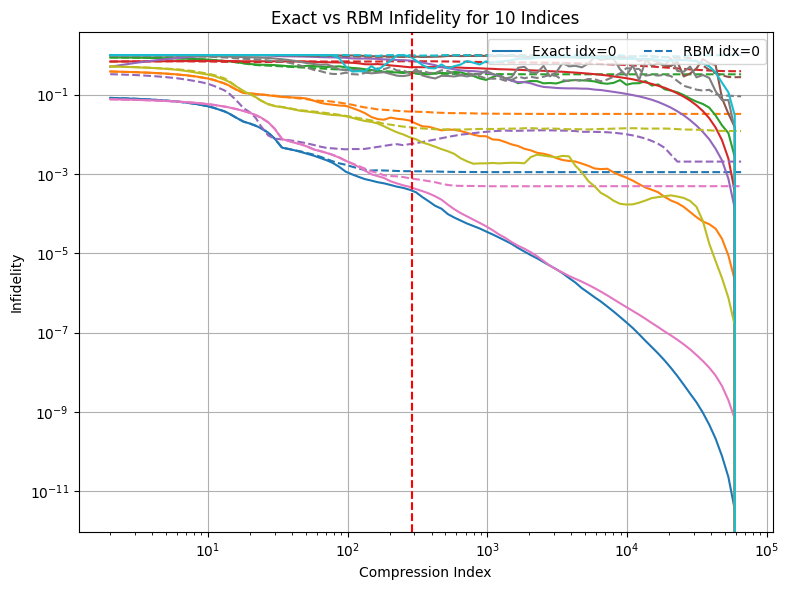

In [16]:
plt.figure(figsize=(8, 6))
colors = plt.cm.tab10.colors

for idx in range(10):
    color = colors[idx % len(colors)]
    plt.plot(compr_idx_list, infidels_exact_opt_mat[idx], linestyle='-', color=color, label=f'Exact idx={idx}' if idx == 0 else "")
    plt.plot(compr_idx_list, infidels_RBM_opt_mat[idx], linestyle='--', color=color, label=f'RBM idx={idx}' if idx == 0 else "")

plt.xscale('log')
plt.yscale('log')
plt.axvline(x=16**2+16*2, color='red', linestyle='--')
plt.xlabel('Compression Index')
plt.ylabel('Infidelity')
plt.title('Exact vs RBM Infidelity for 10 Indices')
plt.grid(True)
# Only show legend for the first pair to avoid clutter
plt.legend(loc='upper right', ncol=2)
plt.tight_layout()
plt.show()

In [17]:
df_filter = df_opt[df_opt['idx'].isin(idxs[idxs_below_threshold])]

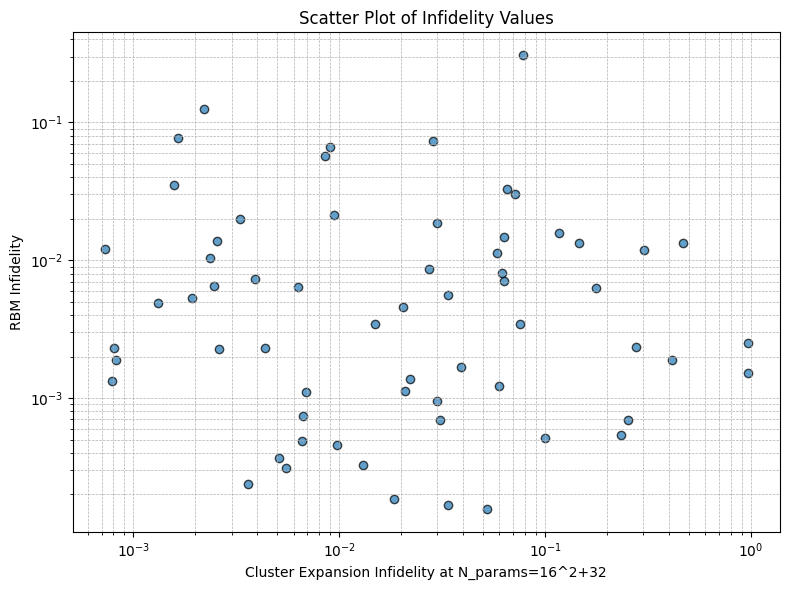

In [18]:
# Extract the infidelity values from the dataframe
df_infidelity = df_filter['infidelity'].values

# Find the index corresponding to N_params=16**2+32
n_params_index = np.argmin(np.abs(compr_idx_list - (16**2 + 32)))
# n_params_index = np.argmin(np.abs(compr_idx_list - (10000)))

# Extract the cluster expansion infidelity values at N_params=16**2+32
cluster_expansion_infidelity = infidels_exact_opt_mat_exp[idxs_below_threshold, n_params_index]
# cluster_expansion_infidelity = infidels_exact_opt_mat[:, n_params_index]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(cluster_expansion_infidelity, df_infidelity, alpha=0.7, edgecolor='k')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Cluster Expansion Infidelity at N_params=16^2+32')
plt.ylabel('RBM Infidelity')
plt.title('Scatter Plot of Infidelity Values')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()